In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

<div class="alert alert-info" role="alert">
    <h1>DATA IMPORT</h1>
</div>

In [2]:
from sklearn import datasets

feature:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 classes:  ['setosa' 'versicolor' 'virginica'] 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76

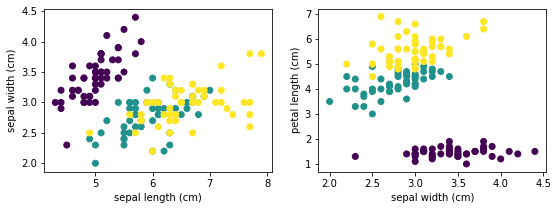

In [3]:
# load iris dataset: 3 classes, 4 features, 50 samples

iris = datasets.load_iris()
print ('feature: ',iris.feature_names,'\n classes: ',iris.target_names,'\n')
print(iris.DESCR,'\n')

data = iris.data
labels = iris.target

print('dimensione features vector',data.shape)
print('dimensione labels vector',labels.shape)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(9,3)
for axis,i in zip(ax,range(0,2)):
  axis.scatter(data[:,i], data[:,i+1], c=labels)
  axis.set_xlabel(iris.feature_names[i])
  axis.set_ylabel(iris.feature_names[i+1])
plt.show()

<div class="alert alert-info" role="alert">
    <h1>DATA PREPROCESSING</h1>
</div>

In [4]:
# split dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2 ,random_state=4)

In [5]:
# shape of train and test objects

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [6]:
# shape of new y objects

print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


<div class="alert alert-info" role="alert">
    <h1>ML MODEL</h1>
</div>

### Decision tree model - 1st use

In [7]:
from sklearn import tree
from sklearn.metrics import accuracy_score

Accuracy is 0.9666666666666667


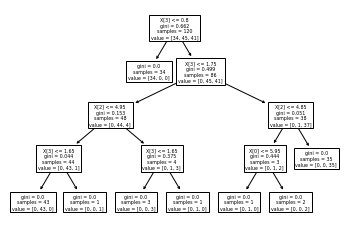

In [8]:
# create an istance of Decision Tree

d_tree = tree.DecisionTreeClassifier(random_state=0)

# train the algorthm 

d_tree = d_tree.fit(X_train, y_train)
y_pred_test = d_tree.predict(X_test)
print(f'Accuracy is {accuracy_score(y_test,y_pred_test)}')

# plot the tree with the plot_tree function:

tree.plot_tree(d_tree) 
plt.show()

In [9]:
import graphviz 

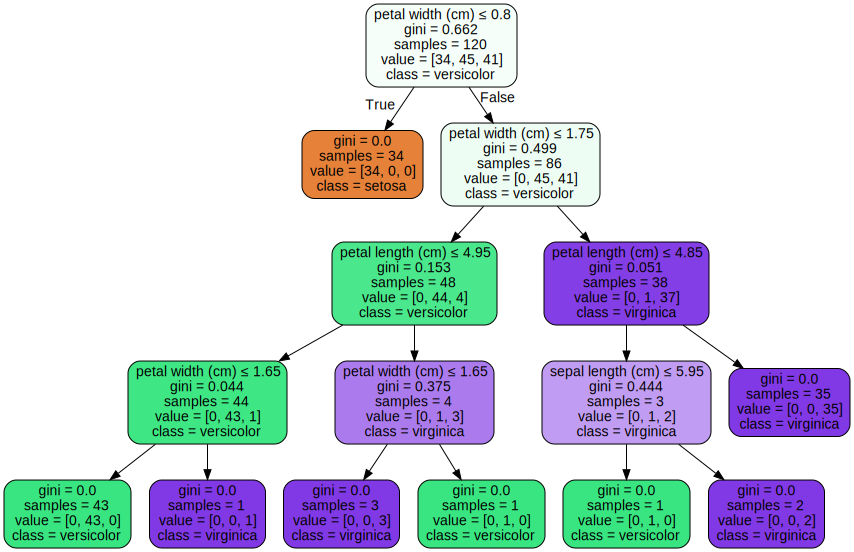

In [10]:
# other implementation to show the tree

dot_data = tree.export_graphviz(d_tree, 
                                out_file=None,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, 
                                rounded=True, 
                                special_characters=True)
graph = graphviz.Source(dot_data)  
graph

### Decision tree model - 2nd use

In [11]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [12]:
# create an istance of Decision Tree

d_tree = tree.DecisionTreeClassifier(random_state=0)

acc=[]
for i in range(1,10):
  d_tree = tree.DecisionTreeClassifier(random_state=0, max_depth=i)
  acc.append(cross_val_score(d_tree, data, labels, cv=10).mean())

print(acc)
print(f'the max accuracy is {max(acc)}')
i_max=acc.index(max(acc))+1
print (f'the max_deph with max accuracy is {i_max}\n')

[0.6666666666666667, 0.9466666666666667, 0.96, 0.9533333333333334, 0.96, 0.96, 0.96, 0.96, 0.96]
the max accuracy is 0.96
the max_deph with max accuracy is 3

